# Notebook-2

# 1. Distance with Breadth First Search

In [2]:
import networkx as nx

## Create an undirected graph from a list of edges

Neighbors of A: ['B', 'C']


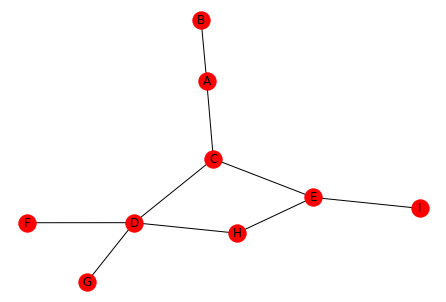

In [12]:
#creating the graph
G=nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),('D','F'),
('D','H'),('D','G'),('E','H'),('E','I')])

#printing the neighbors of the node 'A'
print("Neighbors of A:", list(G.neighbors('A')))

nx.draw(G, node_color='red', with_labels=True)

## Compute BFS distance from A to all nodes using nx.neighbors() method

In [9]:
# PUT YOUR CODE HERE
# Compute and print nodes and distance from A


A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


## Compute BFS distance from A to all nodes using nx.descendants_at_distance() function

In [4]:
# PUT YOUR CODE HERE
# Compute and print nodes and distances from A


At distance 0: {'A'}
At distance 1: {'C', 'B'}
At distance 2: {'E', 'D'}
At distance 3: {'H', 'I', 'G', 'F'}


## Print diameter of the network and average path length

In [13]:
# PUT YOUR CODE HERE (you will only need to call a function)

# Print diameter of the network


# Print average (shortest-)path length


# 2. Clustering coefficient

## Create an adjacency matrix: two-dimensional array

In [6]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]

## Compute clustering coefficient from an adjacency matrix
Compute and print the clustering coefficient of the node 2 from the adjacency matrix above (row 1)

In [7]:
# PUT YOUR CODE HERE

# Compute the degree of node 2 (optional)

degree_node_2 = 3

# Create a list of neighbors of node 2

# Check for all the possible neighbour couples if a link actually exist

# Compute and print the clustering coefficient of node 2 (apply formula)


List of neighbors of node 2: [0, 2, 3]
Clustering coefficient of node 2: 0.3333333333333333


## Compute clustering coefficient from a nx.Graph

1. Convert the adjacency matrix to a nx.Graph
2. Print the clustering coefficient and average clustering coefficient

### Convert an adjacency matrix to a nx.Graph and plot

[[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]] 

(4, 4)
[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 1 0 0]] 

Numer of nodes = 4
List of nodes = [0, 1, 2, 3]
List of edges = [(0, 1), (0, 3), (1, 2), (1, 3)]
  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1

A TRIANGLE!


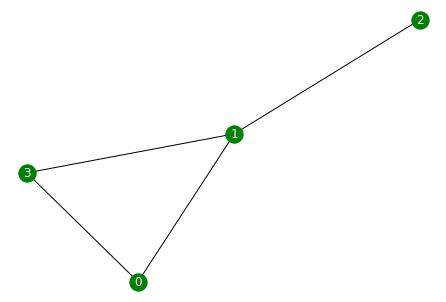

In [8]:
import numpy as np

# The adjacency matrix and numpy arrays have high spatial cost in large networks

print(adjacency_matrix, "\n")

# Numpy array as intermediate type
A = np.array(adjacency_matrix)
print(A.shape)
print(A, "\n")

# The list of edges in a nx.Graph significantly reduces the spatial cost in sparse networks

G = nx.from_numpy_matrix(A)
print("Numer of nodes = {}".format(len(G)))
print("List of nodes = {}".format(G.nodes))
print("List of edges = {}".format(G.edges))
print(nx.adjacency_matrix(G))

nx.draw(G, node_color='green', with_labels=True, font_color="white", font_size=12)

print("\nA TRIANGLE!")

### Print the cluster coefficient and average clustering coefficient

In [9]:
# PUT YOUR CODE HERE (you will only need to call a function)


Clustering coefficient of node 2: 0.3333333333333333
Average clustering coefficient of G: 0.5833333333333333


## Check connectedness between a pair of nodes

 Number of node-independent paths between two nodes.

In [10]:
from networkx.algorithms import approximation

print ("Number of indep. paths 1<-->2: ", nx.algorithms.approximation.local_node_connectivity(G, 1, 2))
print ("Number of indep. paths 0<-->3: ",nx.algorithms.approximation.local_node_connectivity(G, 0, 3))
print ("Number of indep. paths 1<-->3: ",nx.algorithms.approximation.local_node_connectivity(G, 0, 3))

Number of indep. paths 1<-->2:  1
Number of indep. paths 0<-->3:  2
Number of indep. paths 1<-->3:  2
